#### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys

In [4]:
!pip install changefinder

In [5]:
import changefinder

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Сначала рассмотрим результат действия методов на синтетических данных

Генерация данных

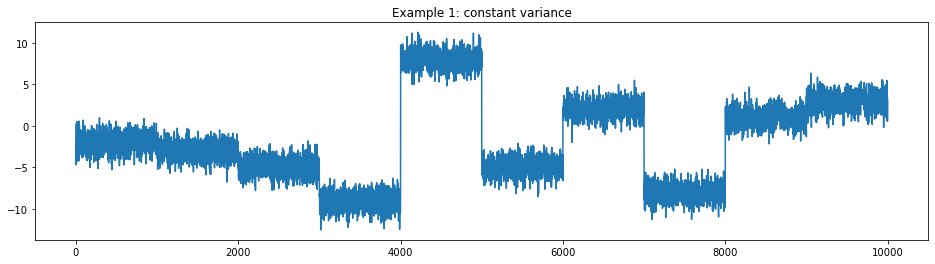

In [6]:
# Постоянная дисперсия
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)
plt.figure(figsize=(16,4))
plt.title('Example 1: constant variance')
plt.plot(ts1)



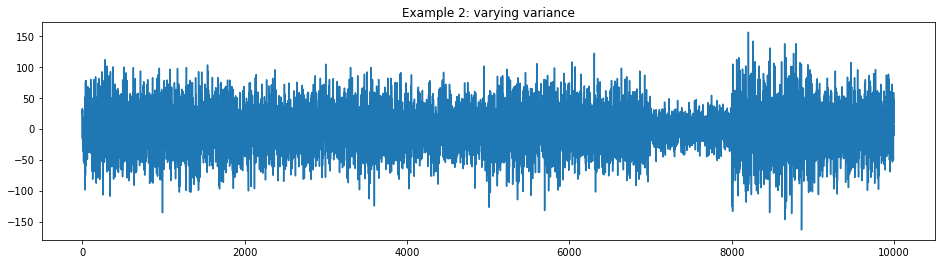

In [7]:
# Изменяющаяся дисперсия
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg) 
    ts2 = np.append(ts2,ts, axis=0)    
plt.figure(figsize=(16,4))
plt.title('Example 2: varying variance')
plt.plot(ts2)

###  Changefinder (online)

In [8]:
def findChangePoints(ts, r, order, smooth):
    '''
       r: Discounting rate
       order: AR model order
       smooth: smoothing window size T
    '''
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    plt.figure(figsize=(16,4))
    plt.plot(ts_score, color='red')
    return(ts_score)

#### Случай с постоянной дисперсией

Получаем точки изменения

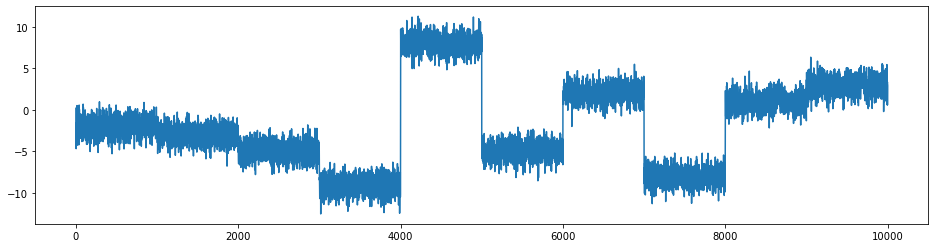

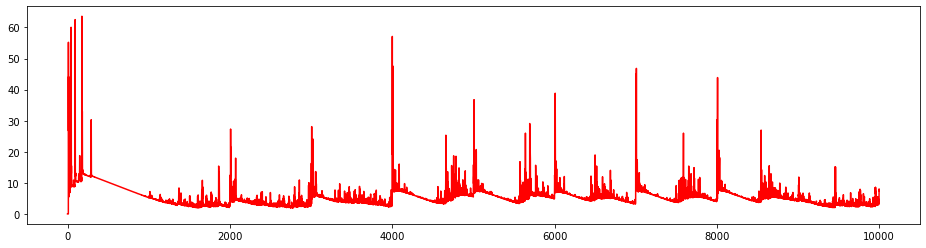

In [9]:
ts_score1 = findChangePoints(ts1, r = 0.01, order = 3, smooth = 5)

Вывод точек изменения

In [10]:
ts_change_loc1 = pd.Series(ts_score1).nlargest(30)
ts_change_loc1 = ts_change_loc1.index
ts_change_loc1

Int64Index([ 177,   94,   44, 4001,   11,  176,   43,   95, 4008, 4000, 7008,
            4007, 7001,   13, 8008, 8007, 7007, 6008, 7000, 5008,   45, 5007,
              36,  182, 6007, 8001,  292,   93, 5694,   14],
           dtype='int64')

Визуализация полученных данных

In [3]:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

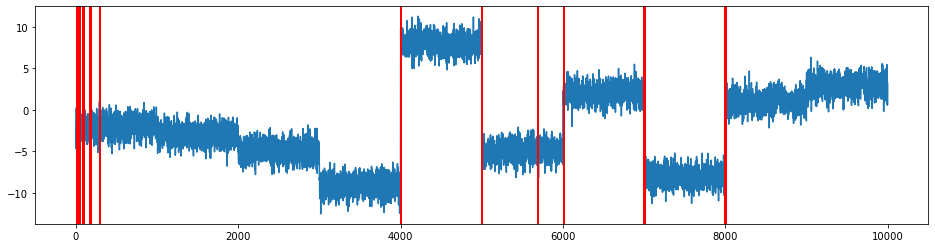

In [12]:
plot_change_points(ts1,ts_change_loc1)

#### Случай с изменяющейся дисперсией

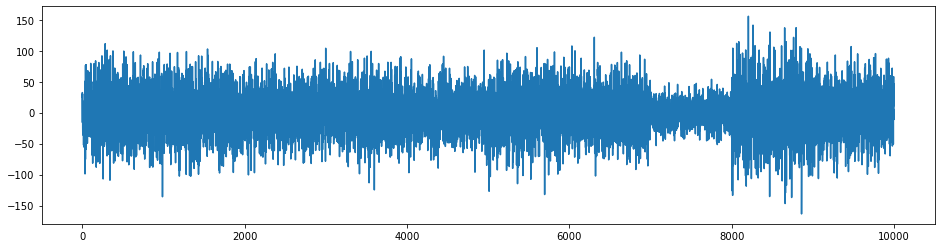

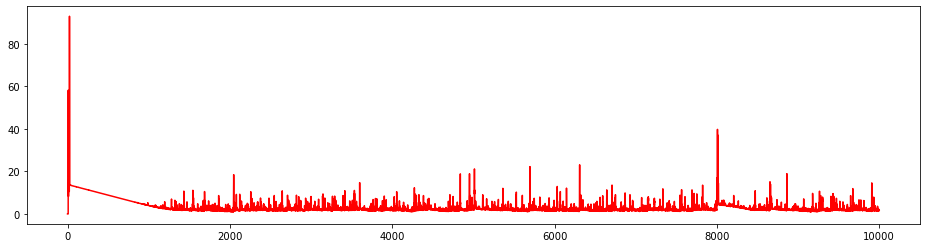

In [13]:
ts_score2 = findChangePoints(ts2, r = 0.01,     order = 3,  smooth =3)

Получение точек изменения

In [14]:
ts_change_loc2 = pd.Series(ts_score2).nlargest(30)
ts_change_loc2 = ts_change_loc2.index
ts_change_loc2

Int64Index([  24,    9,   18,   25,   23,   19, 8007, 8012, 8006, 8011,   16,
            6309, 6308,   17, 5697, 5696, 5013,   15, 8862, 4952, 4839, 5012,
            2047, 8861, 8013, 4951, 4838, 8003,   26, 8654],
           dtype='int64')

Визуализация полученных данных

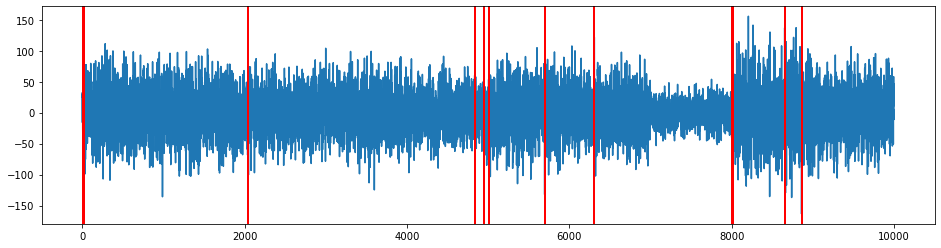

In [15]:
plot_change_points(ts2,ts_change_loc2)

### Ruptures (offline)

#### Случай с постоянной дисперсией

In [4]:
!pip install ruptures
import ruptures as rpt

Обнаружение точек изменения 

In [17]:
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)
change_location1

[1005, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

Визуализация полученных данных

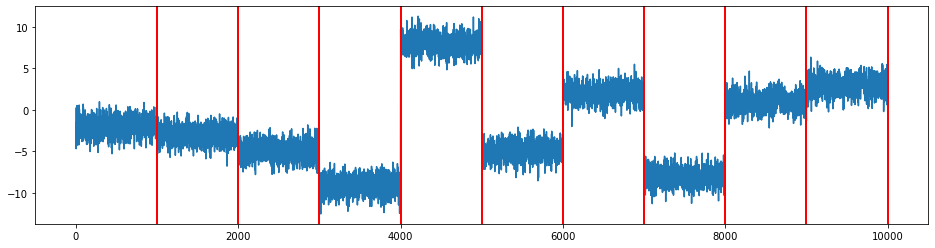

In [18]:
plot_change_points(ts1,change_location1)

#### Случай с изменяющейся дисперсией

Обнаружение точек изменения

In [ ]:
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

In [ ]:
plot_change_points(ts2,change_location2)

Подход основанный на оффлайн (Raptures) прогнозировании показал лучший результат, рассмотрим данный метод покажет себя на реалных данных.

### Рассмотрим на данных SWaT

In [110]:
data = pd.read_excel('SWaT_Dataset_Attack_v0 (1).xlsx', skiprows = 1)
data.head(5)

C:\Users\PC\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


Переведем колонку Timestamp в формат времени

In [111]:
data[' Timestamp'] = pd.to_datetime(data[' Timestamp'])

In [112]:
data[' Timestamp']

0        2015-12-28 10:00:00
1        2015-12-28 10:00:01
2        2015-12-28 10:00:02
3        2015-12-28 10:00:03
4        2015-12-28 10:00:04
                 ...        
449914   2016-02-01 14:59:55
449915   2016-02-01 14:59:56
449916   2016-02-01 14:59:57
449917   2016-02-01 14:59:58
449918   2016-02-01 14:59:59
Name:  Timestamp, Length: 449919, dtype: datetime64[ns]

Установим колонку Timestamp индексом

In [113]:
data = data.set_index(' Timestamp')

In [143]:
data = data.drop(columns=[' Timestamp'], axis=1)

In [144]:
data

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,Normal
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal


Рассмотрим, какие признаки есть в данном датасете

In [115]:
cols = data.columns
cols

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack'],
      dtype='object')

Возьмем только первые 5000 значений

In [135]:
df = data[:5000]
df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2015-12-28 11:23:15,2.617301,662.0323,2,1,1,263.3299,8.447386,317.0982,0.000000,...,2,1,249.9840,1.762086,188.7977,0.000256,1,1,1,Attack
4996,2015-12-28 11:23:16,2.605771,663.0323,2,1,1,263.3299,8.447386,317.0982,0.000000,...,2,1,249.9840,1.762086,188.7977,0.000256,1,1,1,Attack
4997,2015-12-28 11:23:17,2.594562,664.0323,2,1,1,263.3299,8.447386,317.0982,0.000000,...,2,1,249.9840,1.762086,188.8618,0.000256,1,1,1,Attack
4998,2015-12-28 11:23:18,2.574384,665.0323,2,1,1,263.3299,8.447386,317.0982,0.000000,...,2,1,249.9840,1.762086,188.8779,0.000256,1,1,1,Attack


In [139]:
df = df.drop(columns=[' Timestamp'], axis=1)

In [146]:
df_att = data[data["Normal/Attack"] == "Attack"]

In [152]:
list3 = df_att.index

In [154]:
list4=[]
for i in list3:
    if i < 5000:
        list4.append(i)

In [151]:
list3

array([ True,  True,  True, ..., False, False, False])

Визуализируем точки изменения 

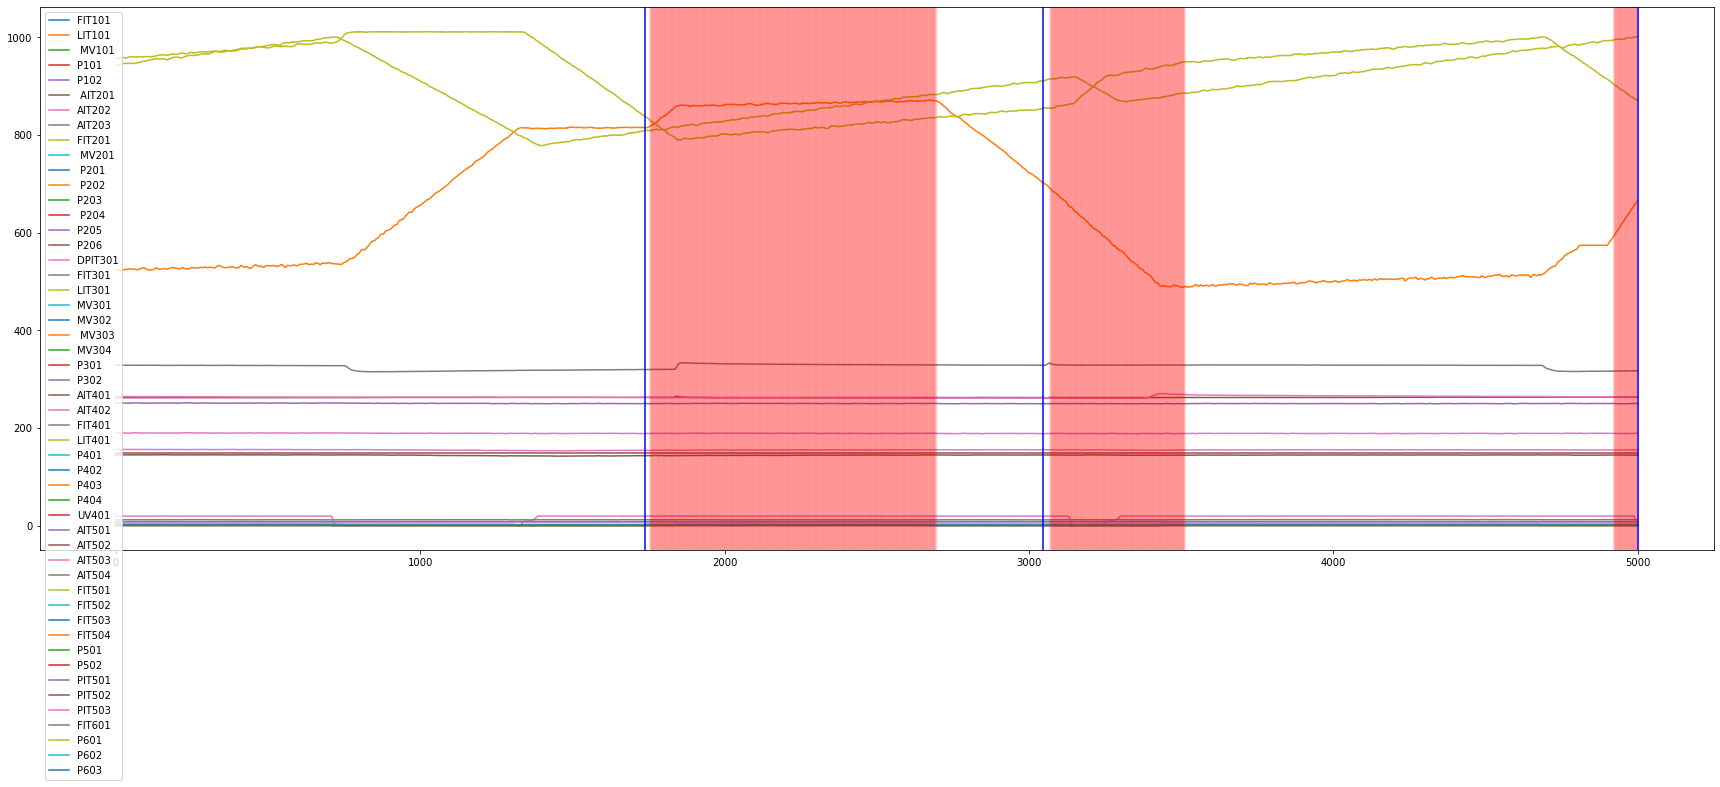

In [159]:
data[:5000].plot(figsize=(30,10))
# list3 = df_att.index
for xc in list4:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.05)   
plt.axvline(x=change_location[0], color = "b")
plt.axvline(x=change_location[1], color = "b")
plt.axvline(x=change_location[2], color = "b")
# plt.legend(loc='upper left')    
# plt.show()

#### Преобразуем данные в необходимый вид
В метод fit, необходимо подать сигнал следующей размерности: (n_samples, n_features)

In [104]:
df = df.drop(columns=["Normal/Attack"], axis=1)

In [105]:
list1=[]
for i in df.columns:
    list1.append(i)

In [106]:
list2=[]
for i in list1:
    list2.append(df[i].values)

In [107]:
arr1 = np.vstack(list2).T
print(np.shape(arr1))

(5000, 51)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr1 = scaler.fit_transform(arr1)

Обучение

In [17]:
result = rpt.Pelt(model="rbf").fit(arr1)
change_location1 = result.predict(pen=10)

Обнаруженные точки изменения

In [43]:
len(change_location1)

23

In [52]:
list1=[]

In [53]:
list1.append(change_location1[7])

In [54]:
list1.append(change_location1[12])

In [55]:
list1.append(change_location1[22])

In [57]:
change_location = list1

Предсказанные точки изменения

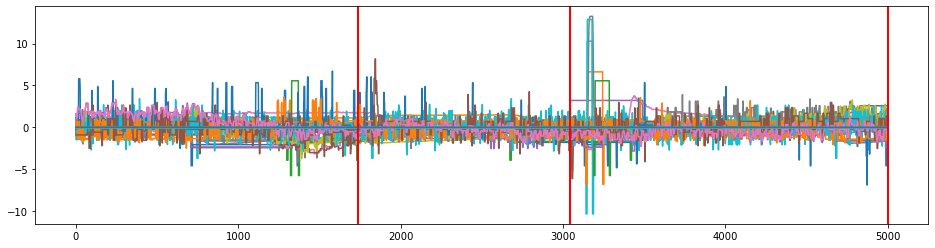

In [58]:
plot_change_points(arr1,change_location)

#### Получим предсказанные точки изменения

Сначала создадим пустой Series

In [59]:
prediction = pd.Series(0,pd.date_range('2015-12-28 10:00:00','2015-12-28 11:23:19',freq='S'))

In [60]:
prediction

2015-12-28 10:00:00    0
2015-12-28 10:00:01    0
2015-12-28 10:00:02    0
2015-12-28 10:00:03    0
2015-12-28 10:00:04    0
                      ..
2015-12-28 11:23:15    0
2015-12-28 11:23:16    0
2015-12-28 11:23:17    0
2015-12-28 11:23:18    0
2015-12-28 11:23:19    0
Freq: S, Length: 5000, dtype: int64

Добавим в него метки точек изменения

In [61]:
j=0
for j in change_location:
    prediction.iloc[j-1]=1
prediction

2015-12-28 10:00:00    0
2015-12-28 10:00:01    0
2015-12-28 10:00:02    0
2015-12-28 10:00:03    0
2015-12-28 10:00:04    0
                      ..
2015-12-28 11:23:15    0
2015-12-28 11:23:16    0
2015-12-28 11:23:17    0
2015-12-28 11:23:18    0
2015-12-28 11:23:19    1
Freq: S, Length: 5000, dtype: int64

Получим реальные точки изменения

In [62]:
true = data["Normal/Attack"]
true=true[:5000]
true

 Timestamp
2015-12-28 10:00:00    Normal
2015-12-28 10:00:01    Normal
2015-12-28 10:00:02    Normal
2015-12-28 10:00:03    Normal
2015-12-28 10:00:04    Normal
                        ...  
2015-12-28 11:23:15    Attack
2015-12-28 11:23:16    Attack
2015-12-28 11:23:17    Attack
2015-12-28 11:23:18    Attack
2015-12-28 11:23:19    Attack
Name: Normal/Attack, Length: 5000, dtype: object

Сначала создадим пустой Series

In [63]:
trues = pd.Series(0,pd.date_range('2015-12-28 10:00:00','2015-12-28 11:23:19',freq='S'))

Возьмем только первые аномалии и будем считать, что они являются точками изменения

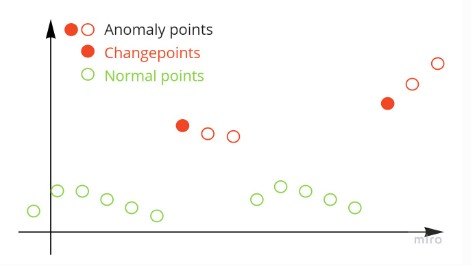


In [64]:
j=0
while j in range(len(true)):
    num = j + 1
    if true[j] == "Attack":
        trues.iloc[j]=1
        # остальным еденицам присваиваем 0
        if true[num] == "Attack":
            while true[num] == "Attack" and num < (len(true)-1):
                trues.iloc[num] == 0
                num +=1
                j = num
    j = j+1
           
trues

2015-12-28 10:00:00    0
2015-12-28 10:00:01    0
2015-12-28 10:00:02    0
2015-12-28 10:00:03    0
2015-12-28 10:00:04    0
                      ..
2015-12-28 11:23:15    0
2015-12-28 11:23:16    0
2015-12-28 11:23:17    0
2015-12-28 11:23:18    0
2015-12-28 11:23:19    0
Freq: S, Length: 5000, dtype: int64

In [65]:
time_index = pd.Series(trues.index)

In [66]:
len(prediction[prediction == 1])

3

In [67]:
trues[prediction == trues].value_counts()

0    4994
dtype: int64

Объединим предсказанные и реальные значения в один датафрейм

In [68]:
df = pd.concat([trues,prediction],1, keys=["true", "pred"]).reset_index()
df

C:\Users\PC\AppData\Local\Temp\ipykernel_10728\480551942.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([trues,prediction],1, keys=["true", "pred"]).reset_index()


,index,true,pred
0,2015-12-28 10:00:00,0,0
1,2015-12-28 10:00:01,0,0
2,2015-12-28 10:00:02,0,0
3,2015-12-28 10:00:03,0,0
4,2015-12-28 10:00:04,0,0
...,...,...,...
4995,2015-12-28 11:23:15,0,0
4996,2015-12-28 11:23:16,0,0
4997,2015-12-28 11:23:17,0,0
4998,2015-12-28 11:23:18,0,0


Переименуем для удобства столбец index в time 

In [69]:
df.rename(columns={'index': 'time'}, inplace=True)

In [70]:
# реальные точки изменения
df[df["true"] == 1]

,time,true,pred
1754,2015-12-28 10:29:14,1,0
3068,2015-12-28 10:51:08,1,0
4920,2015-12-28 11:22:00,1,0


In [71]:
df

,time,true,pred
0,2015-12-28 10:00:00,0,0
1,2015-12-28 10:00:01,0,0
2,2015-12-28 10:00:02,0,0
3,2015-12-28 10:00:03,0,0
4,2015-12-28 10:00:04,0,0
...,...,...,...
4995,2015-12-28 11:23:15,0,0
4996,2015-12-28 11:23:16,0,0
4997,2015-12-28 11:23:17,0,0
4998,2015-12-28 11:23:18,0,0


### Оценим полученный результат 

#### MAE

In [72]:
import datetime as dt
today = dt.date.today()

def maerror(df):
    # Получаем оценку насколько в среднем предсказанная точка изменения (аномалия) близка к действительной
    time_true = 0
    time_pred = 0
    
    for i in range(len(df["true"])-1):

        if df['true'][i] == 1 and df["pred"][i] != 1:
            time_true = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time()
            num = i
            while df["pred"][num] != 1:
                num +=1
                if df["pred"][num] == 1:
                    time_pred = dt.datetime.strptime(str(df["time"][num]), '%Y-%m-%d %H:%M:%S').time()
    
        if df['true'][i] != 1 and df["pred"][i] == 1:
            time_pred = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time()
            num = i
            while df["true"][num] != 1:
                num +=1
                if df["true"][num] == 1:
                    time_true = dt.datetime.strptime(str(df["time"][num]), '%Y-%m-%d %H:%M:%S').time()
                             
        if df['true'][i] == 1 and df["pred"][i] == 1:     
            time_true = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time() 
            time_pred = dt.datetime.strptime(str(df["time"][i]), '%Y-%m-%d %H:%M:%S').time()
                          
        if time_true != 0 and time_pred != 0:        
        #находим разницу между реальным и предсказанным значением
            if time_true > time_pred:
                duration = -1*(dt.datetime.combine(today, time_pred) - dt.datetime.combine(today, time_true))
            else: 
                duration = dt.datetime.combine(today, time_pred) - dt.datetime.combine(today, time_true)
            # рассчитываем MAE (нормируем по числу аномальных точек)
            mae = np.sum(duration)/(len(df[df["pred"] == 1]))
            
            return print("MAE: {}". format(mae))

In [73]:
maerror(df)

MAE: 0:00:05


#### Nab

In [74]:
import tsad
from tsad.evaluating.evaluating import evaluating

In [75]:
df.set_index('time', inplace=True)
df.head()

,true,pred
time,,
2015-12-28 10:00:00,0,0
2015-12-28 10:00:01,0,0
2015-12-28 10:00:02,0,0
2015-12-28 10:00:03,0,0
2015-12-28 10:00:04,0,0


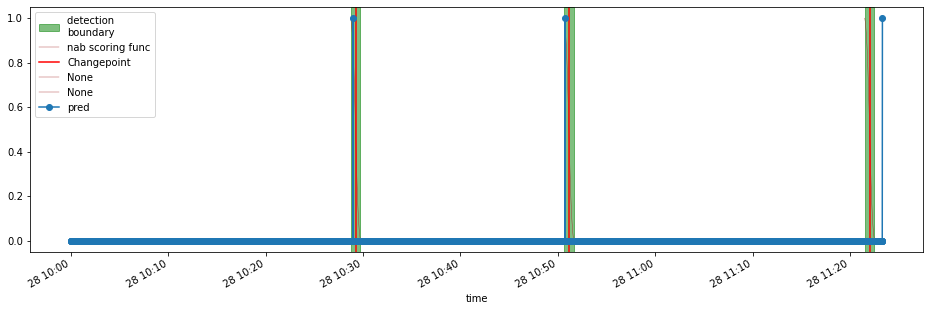

Standart  -  61.52
LowFP  -  59.35
LowFN  -  63.23


In [76]:
numenta_time = "1min" # размер окна
results = evaluating(true=df["true"],prediction=df["pred"], 
                     numenta_time=numenta_time, #Размер окна (10% от всего ряда, деленное на число реальных аномалий)
                     anomaly_window_destenation='center', # Расположение окна относительно аномалии
                     metric='nab', clear_anomalies_mode=True,plot_figure=True)
# Результат:
# Standart - назначает TPs, FPs и FNs с относительными весами (привязанными к размеру окна)
# случайные обнаружения, сделанные в 10% случаев, получат в среднем нулевую итоговую оценку
# LowFP и LowFN - начисляют большие штрафы за FPs и FNs, предназначены для иллюстрации поведения алгоритма.

Красные линии-это реальные точки изменения (аномалии), синие - предсказанные.  
Зеленым цветом показанно окно, в которое попадают предсказанные точки изменения